# In this file we make the evaluator for the data that will predict the reward of a event

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [81]:
event_data = pd.read_csv('processed_data/sample_processed_purchase_events.csv', sep='|')
event_data = event_data.drop(columns=["TIMESTAMP_EVENT"])

In [82]:
event_data

,PRICE,PROPOSITION,USER_CLIENT_NUMBER,ARTICLE_CATEGORIE,USER_SESSION_ID,PROMOTION_LABEL,PAGE_NAME,PAGE_SECTION,PAGE_SECTION_POSITION,PROMOTION_PRICE,...,DEVICE_INFO_BROWSER,USER_SALES_GROUP,USER_SEGMENT,USER_SALES_DISTRICT,USER_PROMOTIONS_ALLOWED,EVENT,DATE,TIME,purchases_7_day_after,purchases_30_day_after
0,25.4760,554657,386730,"1,081,511,193",933,Actie,Shopping Cart,Recommended Products,2.0,25.014,...,Chrome 98.0.4758.102,Cafetaria/Snackbar,fastservice,Hengelo,1,VIEW,2022-02-28,14:51:25.349,0,0
1,25.4760,554657,386730,"1,081,511,193",933,Actie,Shopping Cart,Recommended Products,2.0,25.014,...,Chrome 98.0.4758.102,Cafetaria/Snackbar,fastservice,Hengelo,1,VIEW,2022-02-28,14:51:46.443,0,0
2,25.4760,554657,386730,"1,081,511,193",933,Actie,Shopping Cart,Recommended Products,2.0,25.014,...,Chrome 98.0.4758.102,Cafetaria/Snackbar,fastservice,Hengelo,1,VIEW,2022-02-28,14:52:06.207,0,0
3,12.5268,349240,386730,"1,091,661,078",933,Actie,Shopping Cart,Recommended Products,1.0,11.220,...,Chrome 98.0.4758.102,Cafetaria/Snackbar,fastservice,Hengelo,1,VIEW,2022-02-28,14:52:06.211,0,0
4,12.5268,349240,386730,"1,091,661,078",933,Actie,Shopping Cart,Recommended Products,1.0,11.220,...,Chrome 98.0.4758.102,Cafetaria/Snackbar,fastservice,Hengelo,1,VIEW,2022-02-28,14:51:25.319,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9937932,35.7192,87264,804960,"1,081,451,429",319213,NaN,NaN,NaN,NaN,NaN,...,Chrome 97.0.4692.99,Bedrijven Restaurant,restauratief,Helmond,1,ADD_TO_CARD,2022-01-28,15:48:08.723,1,2
9937933,17.1204,594422,804960,"1,011,031,135",319213,NaN,NaN,NaN,NaN,NaN,...,Chrome 97.0.4692.99,Bedrijven Restaurant,restauratief,Helmond,1,ADD_TO_CARD,2022-01-28,15:46:27.480,1,2
9937934,18.2424,8749,804960,"1,011,011,555",319213,NaN,NaN,NaN,NaN,NaN,...,Chrome 97.0.4692.99,Bedrijven Restaurant,restauratief,Helmond,1,ADD_TO_CARD,2022-01-28,15:48:43.837,1,2
9937935,1.6500,255956,804960,"1,031,161,491",319213,NaN,NaN,NaN,NaN,NaN,...,Chrome 97.0.4692.99,Bedrijven Restaurant,restauratief,Helmond,1,ADD_TO_CARD,2022-01-28,15:48:53.241,1,2


# We will create a binary column for the reward, where 1 means that the reward was greater than 0 and 0 means that the reward was 0

In [83]:
import pandas as pd

# Vectorized operations to create binary columns
event_data['purchased_7_days_after_binary'] = (event_data['purchases_7_day_after'] > 0).astype(int)
event_data['purchased_30_days_after_binary'] = (event_data['purchases_30_day_after'] > 0).astype(int)


# encode the text based columns, of which we will save a dictionary for later use to decode the values

In [84]:
def data_events_to_categories_dict_creation(data_events):
    transformation_dict = {}
    for col in ["PAGE_NAME", "PAGE_SECTION", "PRODUCT_TYPE", "DEVICE_INFO_BRAND", "DEVICE_INFO_TYPE", "DEVICE_INFO_BROWSER", "PROMOTION_LABEL", "USER_SALES_GROUP", "USER_SEGMENT", "USER_SALES_DISTRICT", "EVENT"]:
        print(data_events.keys())
        unique_col_values = data_events[col].unique()
        
        category_number = 0
        transformation_dict[col] = {}
        for col_value in unique_col_values:
            transformation_dict[col][col_value] = category_number
            category_number +=1
    return transformation_dict

transformation_dict = data_events_to_categories_dict_creation(event_data)
transformation_dict

Index(['PRICE', 'PROPOSITION', 'USER_CLIENT_NUMBER', 'ARTICLE_CATEGORIE',
       'USER_SESSION_ID', 'PROMOTION_LABEL', 'PAGE_NAME', 'PAGE_SECTION',
       'PAGE_SECTION_POSITION', 'PROMOTION_PRICE', 'PRODUCT_TYPE',
       'DEVICE_INFO_BRAND', 'DEVICE_INFO_TYPE', 'DEVICE_INFO_BROWSER',
       'USER_SALES_GROUP', 'USER_SEGMENT', 'USER_SALES_DISTRICT',
       'USER_PROMOTIONS_ALLOWED', 'EVENT', 'DATE', 'TIME',
       'purchases_7_day_after', 'purchases_30_day_after',
       'purchased_7_days_after_binary', 'purchased_30_days_after_binary'],
      dtype='object')
Index(['PRICE', 'PROPOSITION', 'USER_CLIENT_NUMBER', 'ARTICLE_CATEGORIE',
       'USER_SESSION_ID', 'PROMOTION_LABEL', 'PAGE_NAME', 'PAGE_SECTION',
       'PAGE_SECTION_POSITION', 'PROMOTION_PRICE', 'PRODUCT_TYPE',
       'DEVICE_INFO_BRAND', 'DEVICE_INFO_TYPE', 'DEVICE_INFO_BROWSER',
       'USER_SALES_GROUP', 'USER_SEGMENT', 'USER_SALES_DISTRICT',
       'USER_PROMOTIONS_ALLOWED', 'EVENT', 'DATE', 'TIME',
       'purchases_7_day

{'PAGE_NAME': {'Shopping Cart': 0,
  nan: 1,
  'Purchase List': 2,
  'Purchaselist': 3},
 'PAGE_SECTION': {'Recommended Products': 0, nan: 1},
 'PRODUCT_TYPE': {'Meepakker': 0, 'Kassakoopje': 1, nan: 2, 'Bestellijst': 3},
 'DEVICE_INFO_BRAND': {'(Windows) PC': 0,
  '(Android) Unknown': 1,
  'Apple Macintosh': 2,
  'Apple iPhone': 3,
  'Apple iPad': 4,
  ' ': 5,
  'Samsung Galaxy Tab 3 10.1': 6,
  'Google Nexus 5': 7,
  'HTC Desire': 8,
  'Apple iPod Touch': 9},
 'DEVICE_INFO_TYPE': {'COMPUTER': 0, 'PHONE': 1, 'TABLET': 2},
 'DEVICE_INFO_BROWSER': {'Chrome 98.0.4758.102': 0,
  'Chrome 96.0.4664.110': 1,
  'Chrome 99.0.4844.51': 2,
  'Chrome 95.0.4638.69': 3,
  'Chrome 97.0.4692.71': 4,
  'Chrome 100.0.4896.60': 5,
  'Chrome 97.0.4692.99': 6,
  'Chrome 100.0.4896.127': 7,
  'Chrome 96.0.4664.45': 8,
  'Chrome 100.0.4896.75': 9,
  'Chrome 98.0.4758.80': 10,
  'Chrome 100.0.4896.88': 11,
  'Chrome 99.0.4844.82': 12,
  'Chrome 89.0.4389.90': 13,
  'Chrome 98.0.4758.87': 14,
  'Chrome 96.0.4

In [85]:
def get_inverse_transformation_dict(transformation_dict):
    #inverse of transformation dict
    inverse_transformation_dict = {}
    for col_name, dict_vals in transformation_dict.items():
        inverse_transformation_dict[col_name] = {}
        for dict_val, cat_num in dict_vals.items():
            inverse_transformation_dict[col_name][cat_num] = dict_val
            
    return inverse_transformation_dict

inverse_transformation_dict = get_inverse_transformation_dict(transformation_dict)
inverse_transformation_dict

{'PAGE_NAME': {0: 'Shopping Cart',
  1: nan,
  2: 'Purchase List',
  3: 'Purchaselist'},
 'PAGE_SECTION': {0: 'Recommended Products', 1: nan},
 'PRODUCT_TYPE': {0: 'Meepakker', 1: 'Kassakoopje', 2: nan, 3: 'Bestellijst'},
 'DEVICE_INFO_BRAND': {0: '(Windows) PC',
  1: '(Android) Unknown',
  2: 'Apple Macintosh',
  3: 'Apple iPhone',
  4: 'Apple iPad',
  5: ' ',
  6: 'Samsung Galaxy Tab 3 10.1',
  7: 'Google Nexus 5',
  8: 'HTC Desire',
  9: 'Apple iPod Touch'},
 'DEVICE_INFO_TYPE': {0: 'COMPUTER', 1: 'PHONE', 2: 'TABLET'},
 'DEVICE_INFO_BROWSER': {0: 'Chrome 98.0.4758.102',
  1: 'Chrome 96.0.4664.110',
  2: 'Chrome 99.0.4844.51',
  3: 'Chrome 95.0.4638.69',
  4: 'Chrome 97.0.4692.71',
  5: 'Chrome 100.0.4896.60',
  6: 'Chrome 97.0.4692.99',
  7: 'Chrome 100.0.4896.127',
  8: 'Chrome 96.0.4664.45',
  9: 'Chrome 100.0.4896.75',
  10: 'Chrome 98.0.4758.80',
  11: 'Chrome 100.0.4896.88',
  12: 'Chrome 99.0.4844.82',
  13: 'Chrome 89.0.4389.90',
  14: 'Chrome 98.0.4758.87',
  15: 'Chrome 96

In [86]:
def transform_df_to_categories(events_table,  inverse_or_transformation_dict, to_categories=True):

    if to_categories:
        for column, mapping in inverse_or_transformation_dict.items():
            events_table[column] = events_table[column].map(lambda x: mapping[x])
    else:
        for column, mapping in inverse_or_transformation_dict.items():
            events_table[column] = events_table[column].map(lambda x: mapping[x])
    return events_table
        
# Replace categorical values using map

    
transformed_event_df = transform_df_to_categories(event_data, transformation_dict, to_categories=True)
transformed_event_df.head()

,PRICE,PROPOSITION,USER_CLIENT_NUMBER,ARTICLE_CATEGORIE,USER_SESSION_ID,PROMOTION_LABEL,PAGE_NAME,PAGE_SECTION,PAGE_SECTION_POSITION,PROMOTION_PRICE,...,USER_SEGMENT,USER_SALES_DISTRICT,USER_PROMOTIONS_ALLOWED,EVENT,DATE,TIME,purchases_7_day_after,purchases_30_day_after,purchased_7_days_after_binary,purchased_30_days_after_binary
0,25.4760,554657,386730,"1,081,511,193",933,0,0,0,2.0,25.014,...,0,0,1,0,2022-02-28,14:51:25.349,0,0,0,0
1,25.4760,554657,386730,"1,081,511,193",933,0,0,0,2.0,25.014,...,0,0,1,0,2022-02-28,14:51:46.443,0,0,0,0
2,25.4760,554657,386730,"1,081,511,193",933,0,0,0,2.0,25.014,...,0,0,1,0,2022-02-28,14:52:06.207,0,0,0,0
3,12.5268,349240,386730,"1,091,661,078",933,0,0,0,1.0,11.220,...,0,0,1,0,2022-02-28,14:52:06.211,0,0,0,0
4,12.5268,349240,386730,"1,091,661,078",933,0,0,0,1.0,11.220,...,0,0,1,0,2022-02-28,14:51:25.319,0,0,0,0


# Visualize the columns and their correlation with the reward

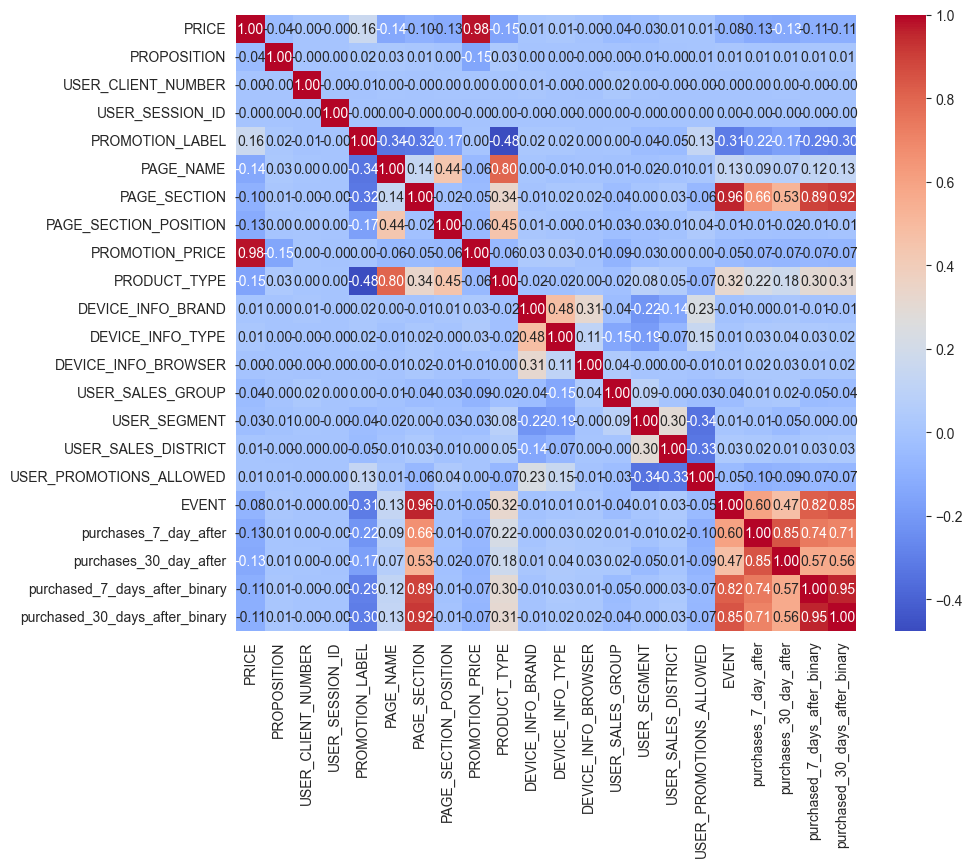

In [87]:
# Compute the correlation matrix
correlational_df = transformed_event_df.drop(columns=["ARTICLE_CATEGORIE", 'DATE', "TIME"])

corr = correlational_df.corr()
#rul_correlation = correlation_matrix['RUL']


# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Show plot
plt.show()

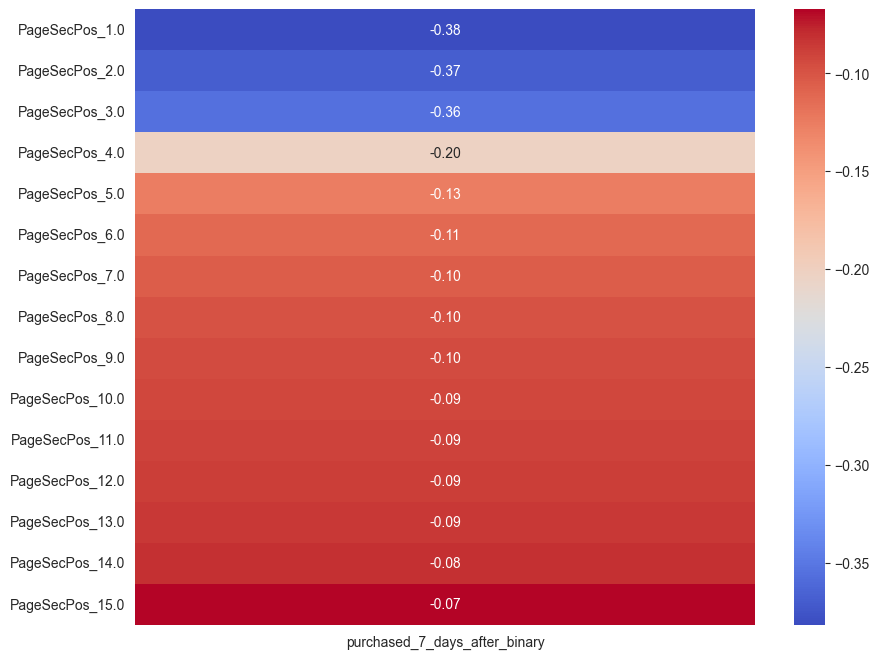

In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'transformed_event_df' is your DataFrame
# Convert 'PAGE_SECTION_POSITION' to dummy variables
dummies = pd.get_dummies(transformed_event_df['PAGE_SECTION_POSITION'], prefix='PageSecPos')

# Assuming 'purchases_7_day_after' is already a numerical column, if not, convert it to binary as below:
# transformed_event_df['purchases_7_day_after'] = transformed_event_df['purchases_7_day_after'].apply(lambda x: 1 if x > 0 else 0)

# Join the dummy variables with the purchases column
data_with_dummies = pd.concat([dummies, transformed_event_df['purchased_7_days_after_binary']], axis=1)

# Calculate correlation matrix
correlation_matrix = data_with_dummies.corr()

# We're interested only in the correlations of dummy variables with 'purchases_7_day_after'
correlation_with_purchases = correlation_matrix.loc['purchased_7_days_after_binary'].drop('purchased_7_days_after_binary')

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap for the correlations with purchases after 7 days
sns.heatmap(correlation_with_purchases.to_frame(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Show plot
plt.show()


/Users/mehdigreefhorst/Desktop/CausalInference/venv/lib/python3.11/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Users/mehdigreefhorst/Desktop/CausalInference/venv/lib/python3.11/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


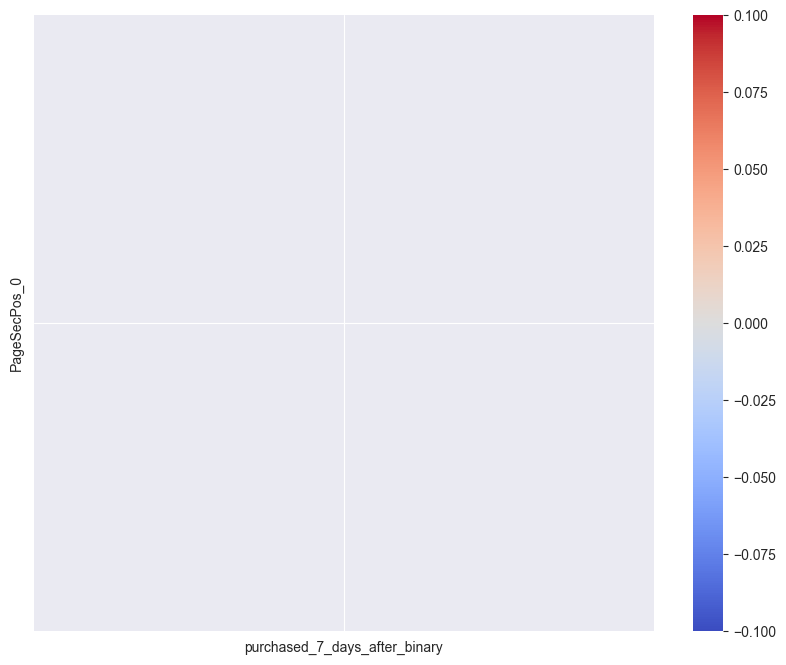

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import copy

# Assuming 'transformed_event_df' is your DataFrame
# Convert 'PAGE_SECTION_POSITION' to dummy variables
copy_transformed_event_df = copy.copy(transformed_event_df)
copy_transformed_event_df["EVENT"] = copy_transformed_event_df["EVENT"].map(lambda x: copy_transformed_event_df["EVENT"][x])
dummies = pd.get_dummies(copy_transformed_event_df['EVENT'], prefix='PageSecPos')

# Assuming 'purchases_7_day_after' is already a numerical column, if not, convert it to binary as below:
# transformed_event_df['purchases_7_day_after'] = transformed_event_df['purchases_7_day_after'].apply(lambda x: 1 if x > 0 else 0)

# Join the dummy variables with the purchases column
data_with_dummies = pd.concat([dummies, copy_transformed_event_df['purchased_7_days_after_binary']], axis=1)

# Calculate correlation matrix
correlation_matrix = data_with_dummies.corr()

# We're interested only in the correlations of dummy variables with 'purchases_7_day_after'
correlation_with_purchases = correlation_matrix.loc['purchased_7_days_after_binary'].drop('purchased_7_days_after_binary')

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap for the correlations with purchases after 7 days
sns.heatmap(correlation_with_purchases.to_frame(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Show plot
plt.show()


/Users/mehdigreefhorst/Desktop/CausalInference/venv/lib/python3.11/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Users/mehdigreefhorst/Desktop/CausalInference/venv/lib/python3.11/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


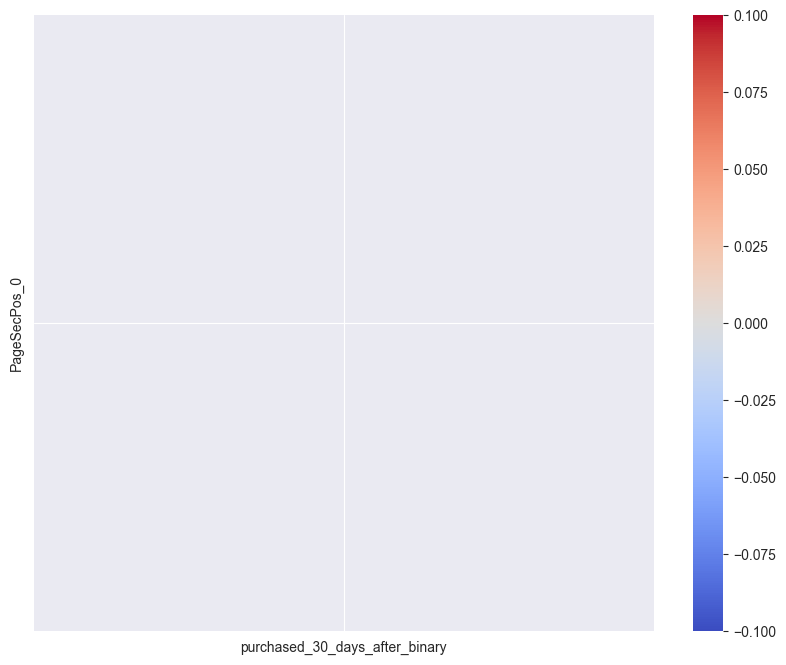

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'transformed_event_df' is your DataFrame
# Convert 'PAGE_SECTION_POSITION' to dummy variables

dummies = pd.get_dummies(copy_transformed_event_df['EVENT'], prefix='PageSecPos')

# Assuming 'purchases_7_day_after' is already a numerical column, if not, convert it to binary as below:
# transformed_event_df['purchases_7_day_after'] = transformed_event_df['purchases_7_day_after'].apply(lambda x: 1 if x > 0 else 0)

# Join the dummy variables with the purchases column
data_with_dummies = pd.concat([dummies, copy_transformed_event_df['purchased_30_days_after_binary']], axis=1)

# Calculate correlation matrix
correlation_matrix = data_with_dummies.corr()

# We're interested only in the correlations of dummy variables with 'purchases_7_day_after'
correlation_with_purchases = correlation_matrix.loc['purchased_30_days_after_binary'].drop('purchased_30_days_after_binary')

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap for the correlations with purchases after 7 days
sns.heatmap(correlation_with_purchases.to_frame(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Show plot
plt.show()


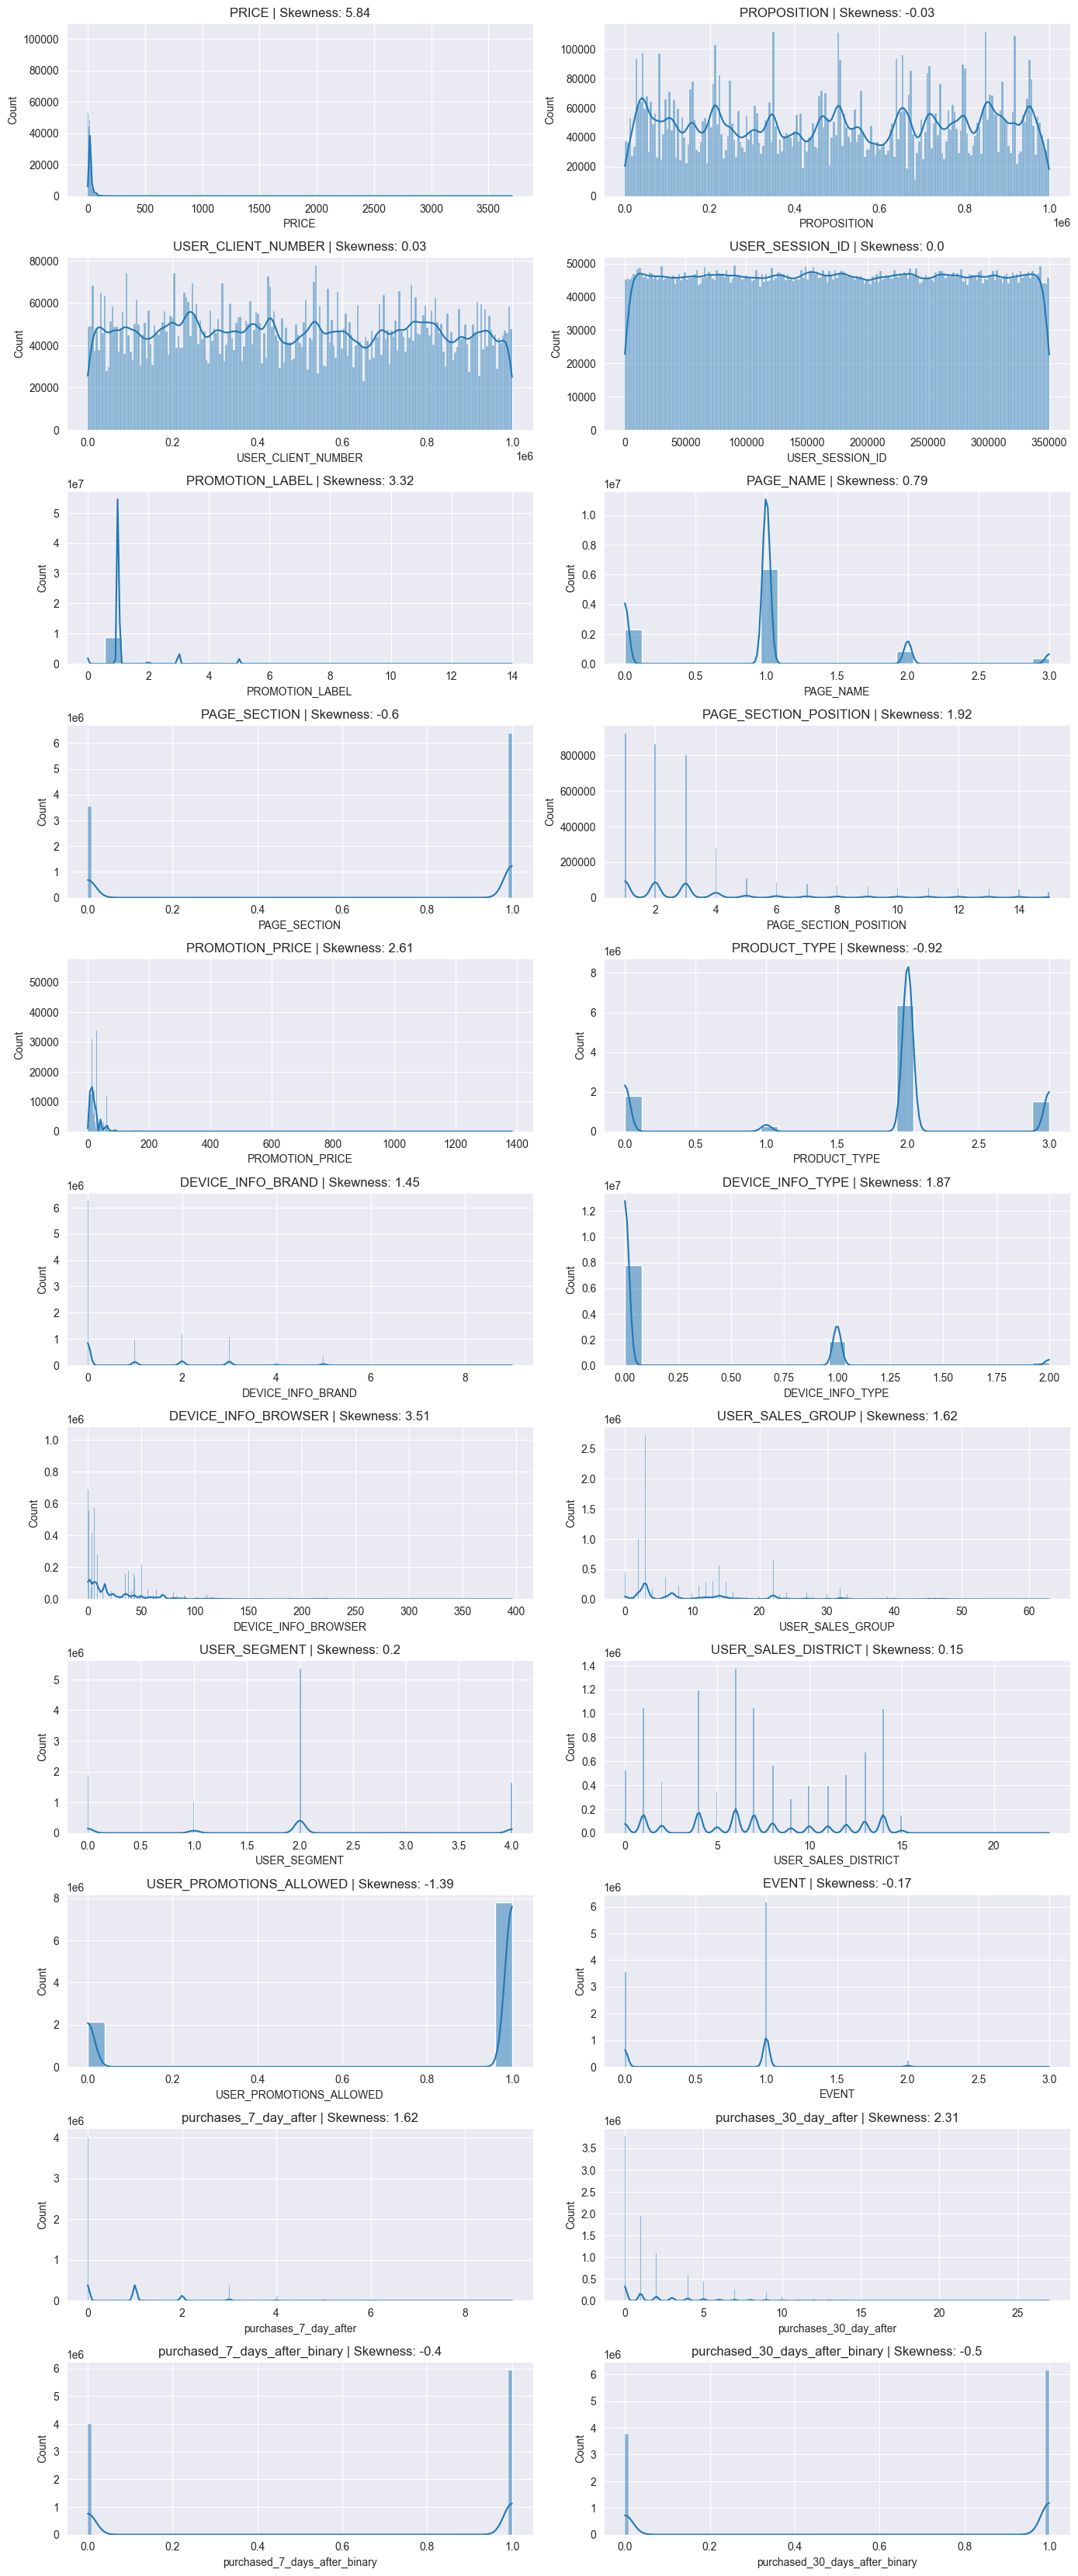

In [91]:
# Set Seaborn style
sns.set_style("darkgrid")
 
# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(correlational_df.columns) * 3))
for idx, feature in enumerate(correlational_df.columns, 1):
    plt.subplot(len(correlational_df.columns), 2, idx)
    sns.histplot(correlational_df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(correlational_df[feature].skew(), 2)}")
 
# Adjust layout and show plots
plt.tight_layout()
plt.show()

# We will now create a model that will predict the reward of a event
We will use a random forest model to do so

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


In [93]:
independent_variables = transformed_event_df.drop(columns=["purchases_7_day_after", "purchases_30_day_after", "purchased_7_days_after_binary", "purchased_30_days_after_binary", "DATE", "TIME","ARTICLE_CATEGORIE"])
dependent_variable = transformed_event_df["purchased_7_days_after_binary"]

X_train, X_test, y_train, y_test = train_test_split(independent_variables, dependent_variable, test_size=0.2, random_state=42)



In [ ]:
# Create a random forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")
